In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [90]:
def distance(point1, point2):
    """Calculates the distance between two points.
    
    Parameters
    ----------
    point1 : array
        The x and y position of the first point.
    point2 : array
        The x and y position of the second point.

    Returns
    -------
    float
        The distance between the two points.
    """
    dist = math.sqrt((point2[0]-point1[0])**2 + (point2[1]-point1[1])**2)
    return dist
def find_nearest_centroid(point, centroids):
    """Finds the nearest centroid of a point.

    Parameters
    ----------
    point : array
        The x and y pos of the point.
    centroids : array
        A 2D array of the positions of the centroids.

    Returns
    -------
    int
        The index of the closest centroid.
    """
    smallest_dist = -1
    nearest_centroid_index = 0
    index = 0
    for centroid in centroids:
        dist = distance(point, centroid)
        if index == 0:
            smallest_dist = dist
        elif dist < smallest_dist:
            smallest_dist = dist
            nearest_centroid_index = index
        index += 1
    return nearest_centroid_index
def move_centroid(datapoints, centroid):
    """Moves a centroid depending on all of the datapoints in its cluster.

    Parameters
    ----------
    datapoints : array
        A 2D array of the positions of the datapoints within the centroid's cluster.
    centroid : array
        The x and y pos of the centroid.

    Returns 
    -------
    array
        The x and y pos of the moved centroid
    """
    # This is done because we don't want to divide by 0 when calculating the averages.
    if len(datapoints) is 0:
        return centroid
    else:
        x_vals = [x[0] for x in datapoints]
        y_vals = [x[1] for x in datapoints]
        x_avg = sum(x_vals)/len(datapoints)
        y_avg = sum(y_vals)/len(datapoints)
        return [x_avg, y_avg]

In [91]:
def k_means(datapoints, k, return_type):
    """Implementation of k_means clustering algorithm in python.

    Only works for datasets with two features.

    Parameters
    ----------
    datapoints : array
        2D array of x and y coordinates.
    k : int
        Number of clusters.
    return_type : bool 
        If True, returns array of centroids, 
        if False, returns datapoints labeled with what cluster they belong to.

    Returns
    -------
    array
        Array of centroids or array of datapoints, depending on return_type parameter.
    """
    # select random datapoints to be centroids
    centroidIndexes = np.random.choice(len(datapoints), k, replace=False)
    centroids = []
    for i in centroidIndexes:
        centroids.append(datapoints[i-1])
    # inital assigning of datapoints to centroids
    for datapoint in datapoints:
        nearest_centroid = find_nearest_centroid(datapoint, centroids)
        datapoint.append(nearest_centroid)
    centroids_changed = True
    datapoints_of_each_centroid = []
    while centroids_changed:
        centroids_changed = False
        # create an array of datapoints for each centroid
        datapoints_of_each_centroid = [[] for _ in range(k)]
        for datapoint in datapoints:
            datapoints_of_each_centroid[datapoint[2]].append(datapoint)
        # move each centroid
        i = 0
        for centroid_arr in datapoints_of_each_centroid:
            moved_centroid = move_centroid(centroid_arr, centroids[i])
            if centroids[i] != moved_centroid:
                centroids_changed = True
                centroids[i] = moved_centroid
            i += 1
        if centroids_changed:
            # reassign datapoints to moved centroids 
            for datapoint in datapoints:
                nearest_centroid = find_nearest_centroid(datapoint, centroids)
                datapoint[2] = nearest_centroid
    return centroids if return_type else datapoints_of_each_centroid

In [92]:
def plot_dataset_against_centroids(datapoints, centroids):
    """Plots a dataset against its centriods.

    Parameters
    ----------
    datapoints : array
        2D array of x and y coordinates.
    centroids : array
        2D array of the x and y coordinates of the centroids.
    """
    x_val = [x[0] for x in datapoints]
    y_val = [x[1] for x in datapoints]
    plt.scatter(x_val, y_val)
    plt.scatter([x[0] for x in centroids], [x[1] for x in centroids])
    plt.show()
def plot_clusters(data):
    """Plots a dataset of clusters. 
    
    Parameters
    ----------
    data : array
        3D array of x and y coordinates.
    """
    for cluster in data:
        x_val = [x[0] for x in cluster]
        y_val = [x[1] for x in cluster]
        plt.scatter(x_val, y_val)
    plt.show()

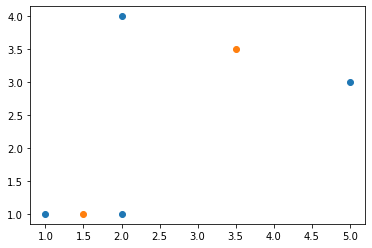

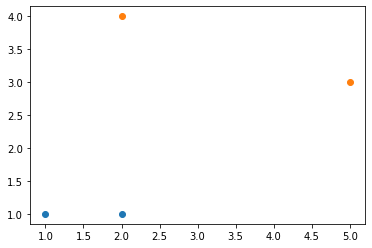

In [93]:
data = [[1, 1], [2, 4], [5, 3], [2, 1]]
centroids = k_means(data, 2, True)
plot_dataset_against_centroids(data, centroids)
clusters = k_means(data, 2, False)
plot_clusters(clusters)